# Notebook Summary: Energy Sector Historical Price Analysis  

This notebook focuses on gathering, processing, and analyzing historical daily closing prices for energy-related equities and financial products sourced from Alpha Vantage. The data spans multiple decades (starting from the late 1990s) and includes a diverse set of 22 tickers representing various energy sector categories and regions.  

---

## **Diverse Tickers**
- **Integrated Oil Majors**: Represented by companies like Exxon Mobil (`XOM`) and Chevron (`CVX`), showcasing stable and long-term trends.  
- **Exploration and Production Companies**: Includes firms like EOG Resources (`EOG`) and Equinor (`EQNR`), emphasizing upstream operations.  
- **Midstream Operators**: Enbridge (`ENB`), focusing on pipeline transportation and storage of crude oil and natural gas.  
- **Specialized Financial Products**: Leveraged ETFs like ProShares Ultra Bloomberg Crude Oil (`UCO`) and ProShares UltraShort Crude Oil (`SCO`) provide high-volatility instruments for active trading.  
- **SPAC and Transition-Oriented Securities**: Includes newer SPAC-related tickers (e.g., `NETD`, `ZTAQU`) with shorter or more sporadic trading histories.  

---

## **Data Coverage**
- **Established Firms**: Long-term price data available for major companies (e.g., `XOM`, `CVX`) since the late 1990s.  
- **Newer Securities**: Missing values are prevalent in financial products and SPAC-related tickers due to their limited trading histories.  

---

## **Data Preparation**
- Consolidated into a **wide-format DataFrame** for cross-ticker analysis.  
- Computed **daily percentage returns** to assess risk, return, and diversification opportunities.  
- Normalized prices relative to their starting values to visualize **relative growth** over time.  
- Added **country-level aggregation** to analyze adjusted closing prices by region.  

---

## **Initial Insights**
- **Volatility**: Leveraged financial products (e.g., `SCO`, `UCO`) and smaller firms exhibit significantly higher volatility compared to more stable oil majors like `XOM` or `CVX`.  
- **Correlations**:  
  - Strong positive correlations exist among major oil companies, suggesting shared macroeconomic and industry trends.  
  - Weaker correlations observed for SPAC-related instruments and specialized ETFs.  
- **Country-Level Trends**:  
  - Average adjusted prices by country reveal **regional market differences** driven by distinct geopolitical, economic, and currency factors.  
  - Notable disparities between developed markets (e.g., USA, Canada) and emerging markets (e.g., Brazil, Russia, Argentina).  

---

## **Enhanced Visualizations**
- **Normalized Price Trends**: Highlight relative growth and volatility across tickers.  
- **Correlation Heatmaps**: Provide a comprehensive overview of return correlations, with annotations emphasizing stronger or weaker relationships.  
- **Hierarchical Clustering**: Demonstrated groupings based on similarity in price movement and correlations.  
- **Country-Level Analysis**: Average adjusted close prices plotted to reveal regional trends over time.  

---

## **Next Steps**
- **Advanced Analysis**:  
  - Statistical modeling, trading strategy backtesting, and econometric analysis using cleaned and prepared data.  
  - Incorporate macroeconomic variables like oil prices, interest rates, and geopolitical events for more robust insights.  
- **Data Refinement**:  
  - Impute missing values for recent securities to improve continuity.  
  - Filter securities based on liquidity and completeness to enhance robustness.  
  - Consider volatility clustering techniques for modeling leveraged products.  
- **Sector-Specific Insights**:  
  - Investigate market-specific events, such as OPEC decisions or regional policy shifts, influencing individual securities and regions.  

---

This notebook provides a foundational dataset and tools for conducting both exploratory and advanced analyses in the energy sector, with significant flexibility for further customization and research focus.


Fetching data for XOM...
Fetching data for CVX...
Fetching data for EOG...
Fetching data for SHEL...
Fetching data for TTE...
Fetching data for PBR...
Fetching data for EQNR...
Fetching data for BP...
Fetching data for SU...
Fetching data for ENB...
Fetching data for REPYY...
Fetching data for STO...
Fetching data for YPF...
Fetching data for LUKOY...
Fetching data for BNO...
Fetching data for NETD...
Fetching data for NETDU...
Fetching data for NETDW...
Fetching data for NOEMU...
Fetching data for SCO...
Fetching data for UCO...
Fetching data for ZTAQU...


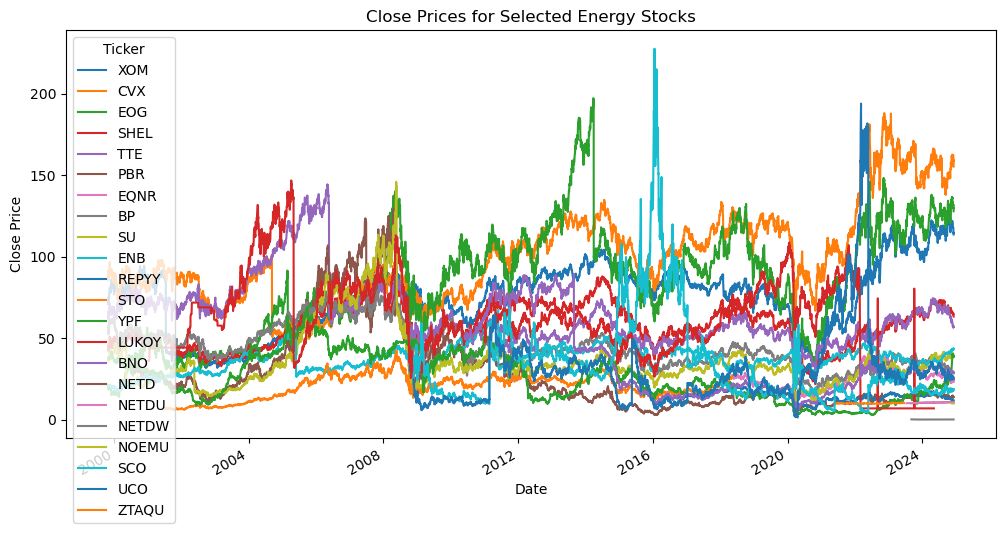

In [1]:
"""
Alpha Advantage has 25 API calls a day for free. Anything more requires a premium at $49.99
"""

import matplotlib.pyplot as plt
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

api_key = ''

tickers = [
    'XOM',  # USA - Exxon Mobil
    'CVX',  # USA - Chevron
    'EOG',  # USA - EOG Resources
    'SHEL',  # Netherlands/UK - Shell
    'TTE',  # France - TotalEnergies
    'PBR',  # Brazil - Petrobras
    'EQNR',  # Norway - Equinor
    'BP',  # UK - British Petroleum
    'SU',  # Canada - Suncor Energy
    'ENB',  # Canada - Enbridge
    'REPYY',  # Spain - Repsol
    'STO',  # Australia - Santos
    'YPF',  # Argentina - YPF Sociedad Anónima
    'LUKOY',  # Russia - Lukoil
    # Additional tickers from filtered data
    'BNO',    # United States Brent Crude Oil Fund
    'NETD',   # Nabors Energy Transition Corp II - Class A
    'NETDU',  # Nabors Energy Transition Corp II - Units (1 Ord 1 War)
    'NETDW',  # Nabors Energy Transition Corp II - Warrants
    'NOEMU',  # CO2 Energy Transition Corp - Units (1 Ord 1 War)
    'SCO',    # ProShares UltraShort Bloomberg Crude Oil -2x Shares
    'UCO',    # ProShares Ultra Bloomberg Crude Oil 2x Shares
    'ZTAQU'   # Zimmer Energy Transition Acquisition Corp - Units
]

# Initialize Alpha Vantage TimeSeries object & fetch data for each ticker
ts = TimeSeries(key=api_key, output_format='pandas')

ticker_data = {}

for ticker in tickers:
    try:
        print(f"Fetching data for {ticker}...")
        data, meta_data = ts.get_daily(symbol=ticker, outputsize='full')
        data['ticker'] = ticker  # Identification
        ticker_data[ticker] = data
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

# Combine all data
combined_data = pd.concat(ticker_data.values(), keys=ticker_data.keys(), axis=0)

# Pivot to create a wide-format DataFrame with '4. close' prices for plotting
close_prices = combined_data['4. close'].unstack(level=0)

# Plot historical prices for each stock
close_prices.plot(figsize=(12, 6), title="Close Prices for Selected Energy Stocks")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(title="Ticker")
plt.show()

In [2]:
flat_data = combined_data.reset_index()
adj_close = flat_data[flat_data['ticker'] == 'XOM']['4. close']
stocks_close = flat_data.pivot(index='date', columns='ticker', values='4. close')
stocks_ret = stocks_close.pct_change()

print("Adjusted Close Prices:")
print(stocks_close.head())

print("\nDaily Returns:")
print(stocks_ret.head())

Adjusted Close Prices:
ticker      BNO     BP    CVX    ENB    EOG  EQNR  LUKOY  NETD  NETDU  NETDW  \
date                                                                           
1999-11-01  NaN  57.25  91.44  21.38  21.00   NaN    NaN   NaN    NaN    NaN   
1999-11-02  NaN  55.25  88.75  21.38  19.25   NaN    NaN   NaN    NaN    NaN   
1999-11-03  NaN  54.25  89.06  21.13  19.69   NaN    NaN   NaN    NaN    NaN   
1999-11-04  NaN  53.56  88.25  20.63  18.94   NaN    NaN   NaN    NaN    NaN   
1999-11-05  NaN  52.31  85.50  20.62  18.31   NaN    NaN   NaN    NaN    NaN   

ticker      ...  REPYY  SCO   SHEL  STO     SU    TTE  UCO    XOM    YPF  \
date        ...                                                            
1999-11-01  ...    NaN  NaN  45.63  NaN  37.81  66.12  NaN  74.75  38.13   
1999-11-02  ...    NaN  NaN  45.75  NaN  37.31  65.75  NaN  74.12  37.81   
1999-11-03  ...    NaN  NaN  45.44  NaN  36.75  64.75  NaN  73.00  37.63   
1999-11-04  ...    NaN  NaN  43.13  

ticker
BNO      2661
BP          0
CVX         0
ENB         0
EOG         0
EQNR     4664
LUKOY     487
NETD     5998
NETDU    5962
NETDW    5998
NOEMU    6305
PBR       196
REPYY    4068
SCO      2281
SHEL        0
STO      2061
SU          0
TTE         0
UCO      2281
XOM         0
YPF         0
ZTAQU    5812
dtype: int64


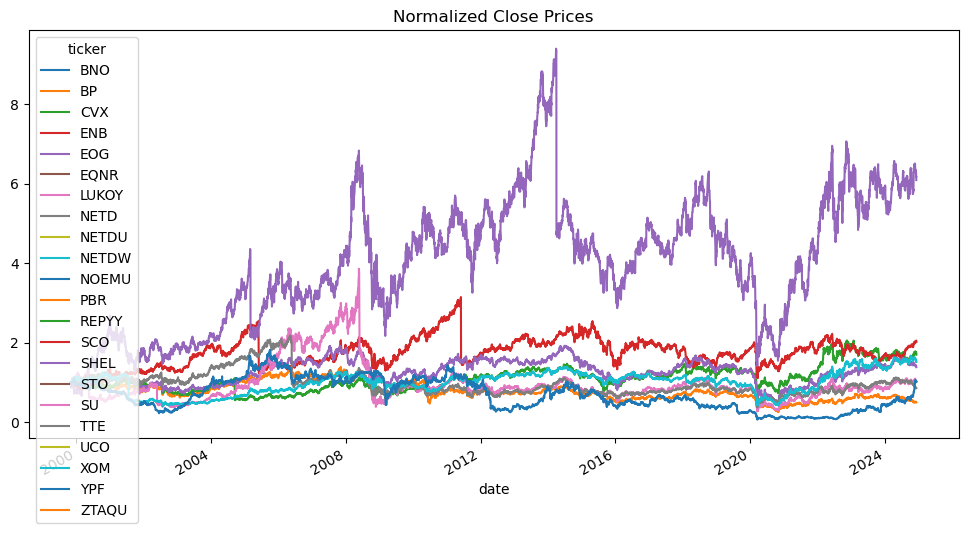

In [3]:
print(stocks_close.isna().sum())
normalized_prices = stocks_close / stocks_close.iloc[0]
normalized_prices.plot(figsize=(12, 6), title="Normalized Close Prices")
plt.show()

In [4]:
return_stats = stocks_ret.describe()
print(return_stats)

ticker          BNO           BP          CVX          ENB          EOG  \
count   3654.000000  6315.000000  6315.000000  6315.000000  6315.000000   
mean       0.000120     0.000070     0.000265     0.000305     0.000663   
std        0.022755     0.018928     0.018462     0.018437     0.026662   
min       -0.506987    -0.191040    -0.490855    -0.513746    -0.495438   
25%       -0.010162    -0.008976    -0.008126    -0.007131    -0.012236   
50%        0.000551     0.000237     0.000639     0.000338     0.000599   
75%        0.011310     0.008953     0.008872     0.008376     0.014067   
max        0.188976     0.216053     0.227407     0.191448     0.204061   

ticker         EQNR        LUKOY        NETD       NETDU       NETDW  ...  \
count   1651.000000  6020.000000  317.000000  353.000000  317.000000  ...   
mean       0.000169     0.005167    0.000186    0.000152    0.003072  ...   
std        0.023042     0.238136    0.001781    0.002196    0.091602  ...   
min       -0.210

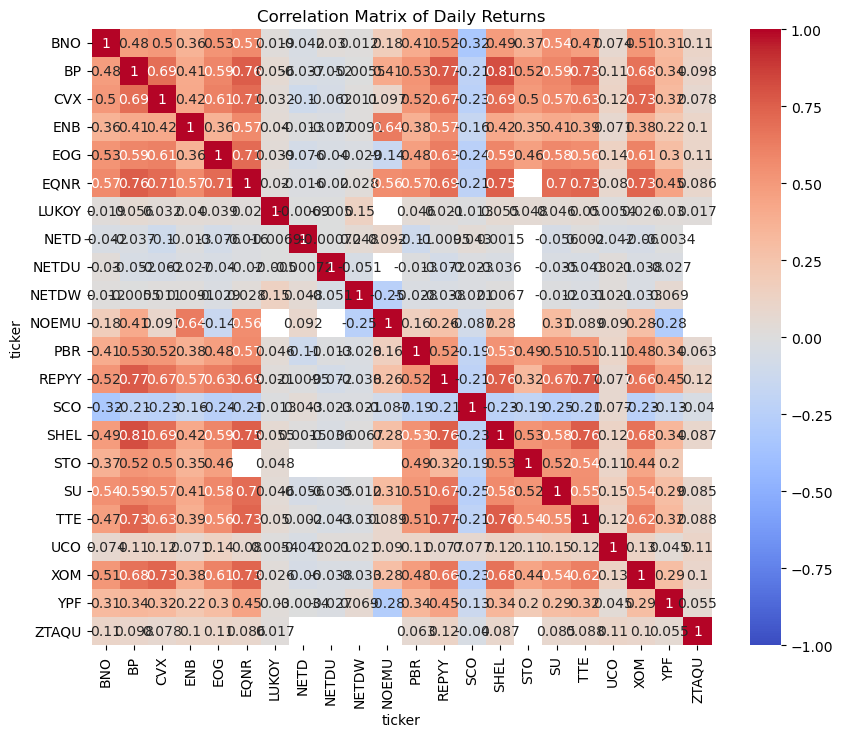

In [5]:
# Plot correlation matrix as a heatmap
correlation_matrix = stocks_ret.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Daily Returns")
plt.show()

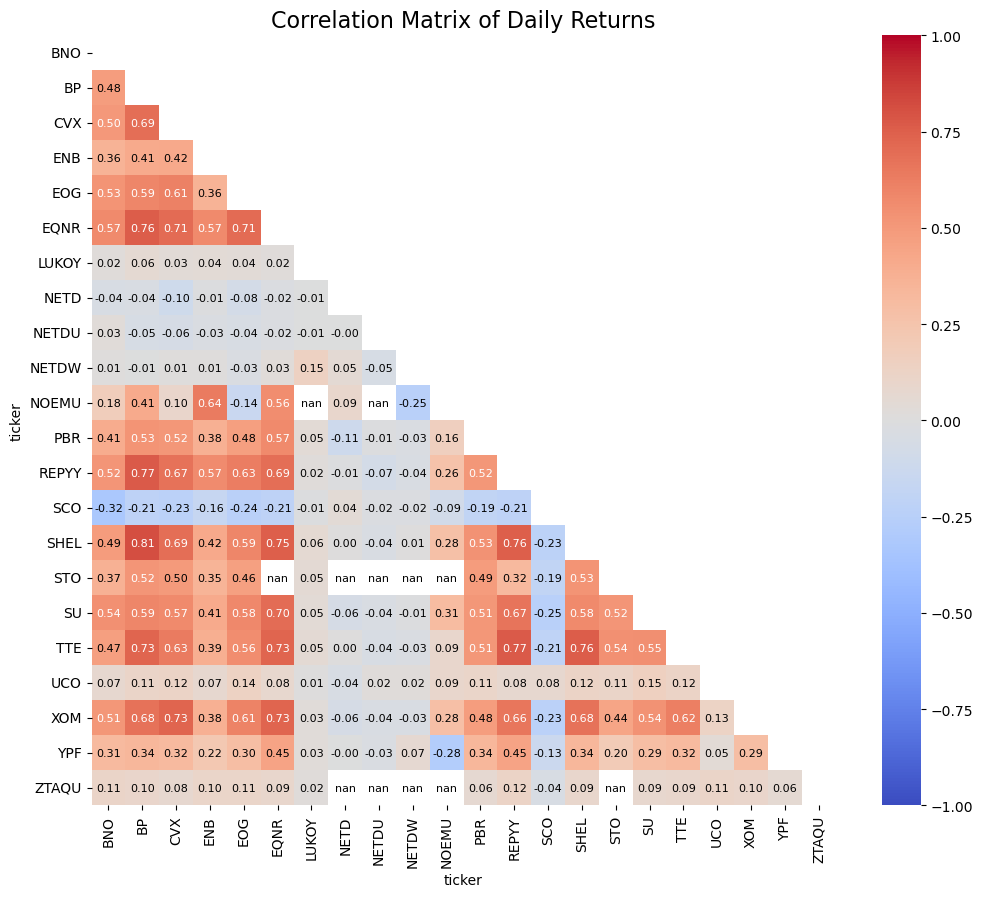

In [6]:
# Enhanced heatmap 
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlation_matrix, 
                 annot=False, 
                 cmap='coolwarm', 
                 fmt=".2f", 
                 vmin=-1, vmax=1, 
                 mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)))

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if not np.triu(np.ones_like(correlation_matrix, dtype=bool))[i, j]:
            value = correlation_matrix.iloc[i, j]
            ax.text(j + 0.5, i + 0.5, f"{value:.2f}", 
                    ha='center', va='center', 
                    fontsize=8, color='white' if abs(value) > 0.5 else 'black')

plt.title("Correlation Matrix of Daily Returns", fontsize=16)
plt.show()

Cleaning correlation matrix...


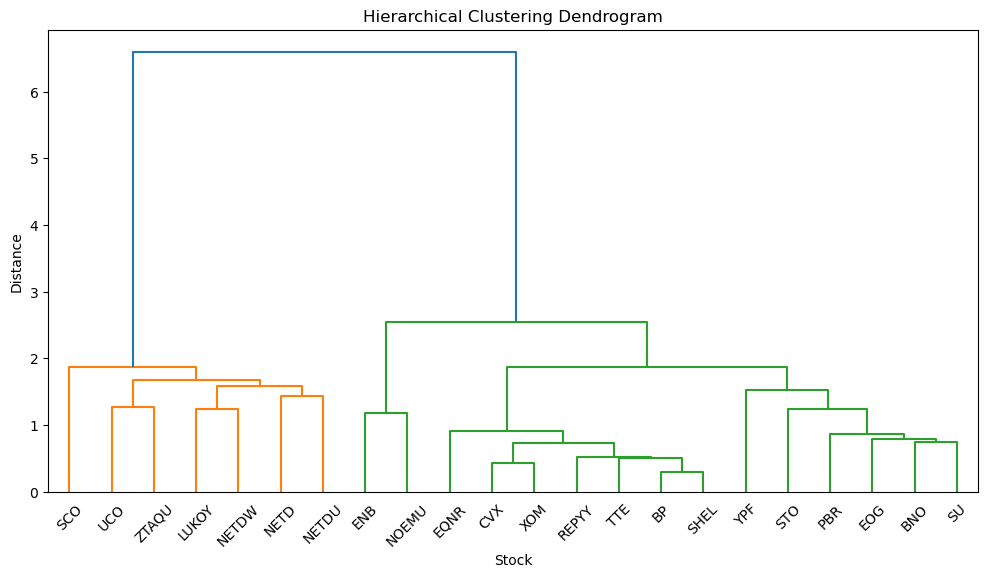

In [7]:
if correlation_matrix.isna().any().any() or np.isinf(correlation_matrix.values).any():
    print("Cleaning correlation matrix...")
    correlation_matrix = correlation_matrix.fillna(0)  # Replace NaN with 0
    correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], 0)  # Replace inf with 0

# Check if the correlation matrix is square
if correlation_matrix.shape[0] != correlation_matrix.shape[1]:
    raise ValueError("Correlation matrix must be square for hierarchical clustering.")

# Compute linkage for hierarchical clustering
link = linkage(correlation_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram_result = dendrogram(link, labels=correlation_matrix.columns)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Stock")
plt.ylabel("Distance")
plt.show()

In [8]:
ticker_to_country = {
    'XOM': 'United States',  # Exxon Mobil
    'CVX': 'United States',  # Chevron
    'EOG': 'United States',  # EOG Resources
    'SHEL': 'Netherlands',  # Shell
    'TTE': 'France',  # TotalEnergies
    'PBR': 'Brazil',  # Petrobras
    'EQNR': 'Norway',  # Equinor
    'BP': 'United Kingdom',  # British Petroleum
    'SU': 'Canada',  # Suncor Energy
    'ENB': 'Canada',  # Enbridge
    'REPYY': 'Spain',  # Repsol
    'STO': 'Australia',  # Santos
    'YPF': 'Argentina',  # YPF Sociedad Anónima
    'LUKOY': 'Russia',  # Lukoil
    'BNO': 'United States',  # United States Brent Crude Oil Fund
    'NETD': 'United States',  # Nabors Energy Transition Corp II - Class A
    'NETDU': 'United States',  # Nabors Energy Transition Corp II - Units (1 Ord 1 War)
    'NETDW': 'United States',  # Nabors Energy Transition Corp II - Warrants
    'NOEMU': 'United States',  # CO2 Energy Transition Corp - Units (1 Ord 1 War)
    'SCO': 'United States',  # ProShares UltraShort Bloomberg Crude Oil -2x Shares
    'UCO': 'United States',  # ProShares Ultra Bloomberg Crude Oil 2x Shares
    'ZTAQU': 'United States',  # Zimmer Energy Transition Acquisition Corp - Units
}

# Convert to a DataFrame for merging
ticker_country_df = pd.DataFrame(list(ticker_to_country.items()), columns=['ticker', 'country'])

In [9]:
stocks_close = stocks_close.reset_index()

# Add the country information
stocks_with_countries = pd.melt(stocks_close, id_vars=['date'], var_name='ticker', value_name='adjusted_close')
stocks_with_countries = stocks_with_countries.merge(ticker_country_df, on='ticker', how='left')

print(stocks_with_countries.head())

        date ticker  adjusted_close        country
0 1999-11-01    BNO             NaN  United States
1 1999-11-02    BNO             NaN  United States
2 1999-11-03    BNO             NaN  United States
3 1999-11-04    BNO             NaN  United States
4 1999-11-05    BNO             NaN  United States


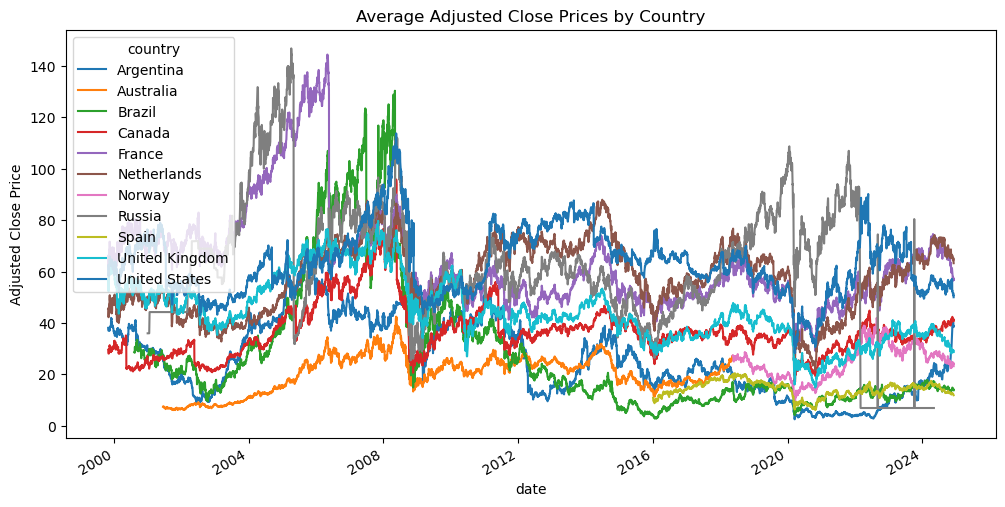

In [10]:
country_avg_prices = stocks_with_countries.groupby(['date', 'country'])['adjusted_close'].mean().reset_index()
country_avg_prices.pivot(index='date', columns='country', values='adjusted_close').plot(figsize=(12, 6))
plt.title('Average Adjusted Close Prices by Country')
plt.ylabel('Adjusted Close Price')
plt.show()

In [11]:
combined_data.to_csv("combined_data.csv", index=True)